<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/Face3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM   
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical 
from keras import callbacks 
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 


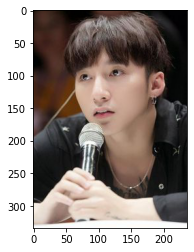

In [5]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/khuon mat (1)/Son tung/1c1969af6260b1176c5485471e241134.jpg")
plt.imshow(img)

In [6]:
train = ImageDataGenerator(rescale=1/255)


In [7]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory="/content/drive/MyDrive/Colab Notebooks/khuon mat (1)",
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory="/content/drive/MyDrive/Colab Notebooks/khuon mat (1)",
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 63 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [8]:
import glob
ngoai = glob.glob('/content/drive/MyDrive/Colab Notebooks/khuon mat (1)/Ngoại/*.*')
son_tung = glob.glob('/content/drive/MyDrive/Colab Notebooks/khuon mat (1)/Son tung/*.*')
trang = glob.glob('/content/drive/MyDrive/Colab Notebooks/khuon mat (1)/Trang/*.*')

data = []
labels = []

for i in ngoai:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in son_tung:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in trang:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (150,150))
    image=np.array(image)
    data.append(image)
    labels.append(1)

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [9]:
train_dataset.class_indices

{'Ngoại': 0, 'Son tung': 1, 'Trang': 2}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [11]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lan tich chap
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lan tich chap
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

# model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lan tich chap
# model.add(Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
# model.add(MaxPooling2D(2,2))
from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [12]:
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])

In [13]:
history=model.fit(train_dataset,batch_size=100,epochs=10,validation_data=validation_dataset)

Epoch 1/10
2/2 [==============================] - 27s 6s/step - loss: 26309.6016 - accuracy: 0.3968 - val_loss: 22.3982 - val_accuracy: 0.3333
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 12.9922 - accuracy: 0.3175 - val_loss: 3.6435 - val_accuracy: 0.5333
Epoch 3/10
2/2 [==============================] - 3s 2s/step - loss: 2.7123 - accuracy: 0.4444 - val_loss: 0.2798 - val_accuracy: 0.5333
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.2221 - accuracy: 0.6190 - val_loss: 0.1773 - val_accuracy: 0.8000
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.1516 - accuracy: 0.6984 - val_loss: 0.1316 - val_accuracy: 0.8000
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.0924 - accuracy: 0.8730 - val_loss: 0.1510 - val_accuracy: 0.8000
Epoch 7/10
2/2 [==============================] - 3s 2s/step - loss: 0.1002 - accuracy: 0.9365 - val_loss: 0.0982 - val_accuracy: 0.8000
Epoch 8/10
2/2 [==================

In [14]:
from tensorflow.keras.models import load_model
model.save('Face.h5')
model_ANN = load_model('Face.h5')

array(['Trang'], dtype='<U8')

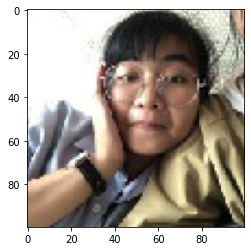

In [18]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/MyDrive/Colab Notebooks/khuon mat (1)/Trang/6051db14907c5022096d.jpg"
img = load_img(filename,target_size=(100,100))
plt.imshow(img)

predict = ['Ngoai','Son tung','Trang']
predict = np.array(predict)


img = load_img(filename,target_size=(150,150))
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255

result = np.argmax(model_ANN.predict(img),axis=-1)
predict[result]

array(['Ngoai'], dtype='<U8')

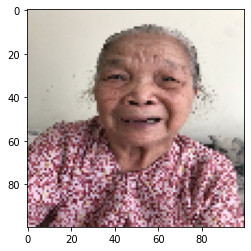

In [19]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "/content/drive/MyDrive/Colab Notebooks/khuon mat (1)/Ngoại/Ngoại/z3440563694515_85b0c26b6c9dd9ffeb073852e2a3a8a8.jpg"
img = load_img(filename,target_size=(100,100))
plt.imshow(img)

predict = ['Ngoai','Son tung','Trang']
predict = np.array(predict)


img = load_img(filename,target_size=(150,150))
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255

result = np.argmax(model_ANN.predict(img),axis=-1)
predict[result]